Code for Abalone Dataset무시

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [12]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [13]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


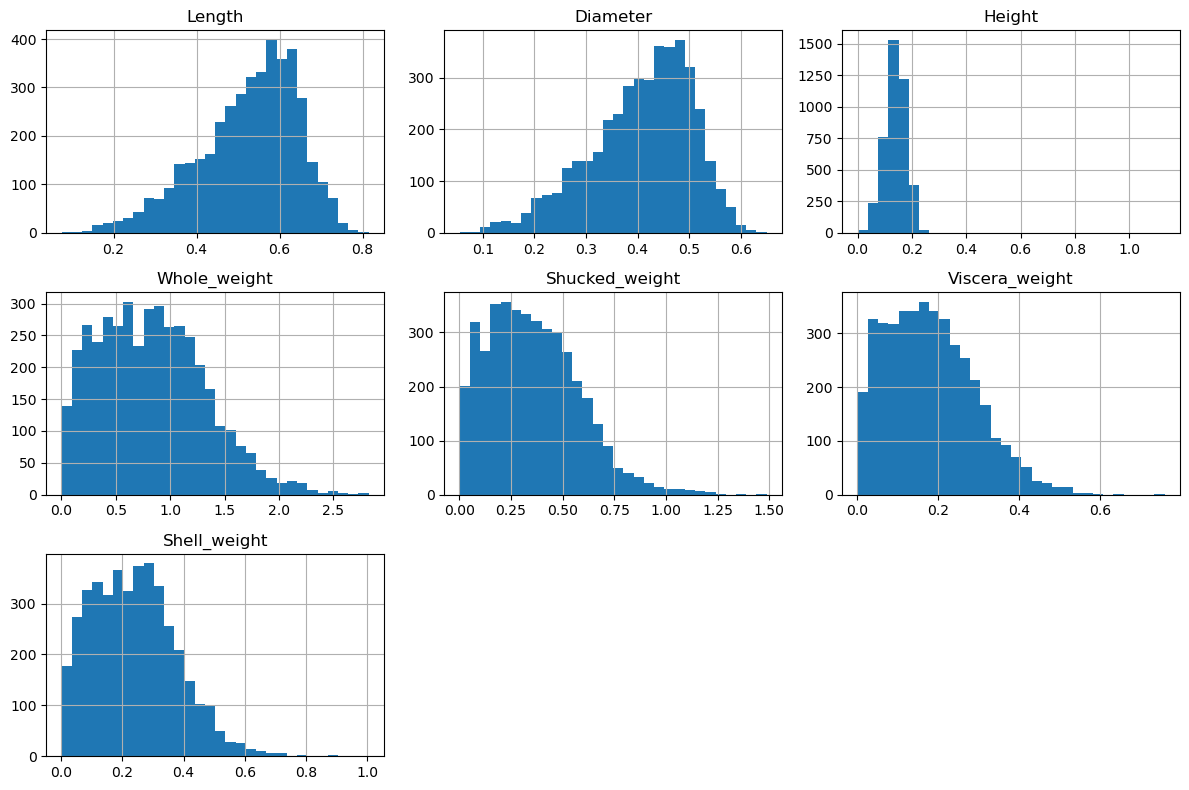

In [7]:
import matplotlib.pyplot as plt

X.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

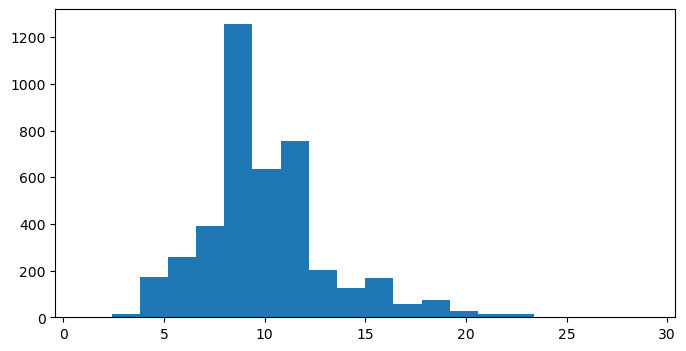

             Rings
count  4177.000000
mean      9.933684
std       3.224169
min       1.000000
25%       8.000000
50%       9.000000
75%      11.000000
max      29.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.hist(y, bins=20)
plt.show()

print(y.describe())

In [3]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# AutoGluon용 데이터 준비
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test
# AutoML 모델 학습
predictor = TabularPredictor(label='target').fit(train_data)

predictions = predictor.predict(test_data.drop(columns=['target']))
print(predictor.evaluate(test_data))

No path specified. Models will be saved in: "AutogluonModels\ag-20250613_050741"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       8.37 GB / 15.69 GB (53.3%)
Disk Space Avail:   317.99 GB / 476.05 GB (66.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

{'accuracy': 0.29473684210526313, 'balanced_accuracy': 0.1577012626196434, 'mcc': 0.19763505959395405}


In [4]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.298565,0.289157,accuracy,0.110805,0.016713,65.454502,0.110805,0.016713,65.454502,1,True,8
1,WeightedEnsemble_L2,0.294737,0.305221,accuracy,2.289722,0.466780,172.751761,0.079377,0.000000,0.319759,2,True,14
2,NeuralNetTorch,0.288038,0.291165,accuracy,0.127230,0.031761,27.621447,0.127230,0.031761,27.621447,1,True,12
3,LightGBMXT,0.279426,0.283133,accuracy,0.291936,0.096179,34.030455,0.291936,0.096179,34.030455,1,True,4
4,ExtraTreesGini,0.270813,0.244980,accuracy,0.821686,0.222399,2.997250,0.821686,0.222399,2.997250,1,True,9
5,RandomForestGini,0.266986,0.232932,accuracy,0.758744,0.222642,3.693398,0.758744,0.222642,3.693398,1,True,6
6,XGBoost,0.263158,0.263052,accuracy,0.697042,0.031747,19.767518,0.697042,0.031747,19.767518,1,True,11
7,RandomForestEntr,0.262201,0.238956,accuracy,0.959423,0.240328,2.813573,0.959423,0.240328,2.813573,1,True,7
8,NeuralNetFastAI,0.256459,0.279116,accuracy,0.161646,0.067981,22.560829,0.161646,0.067981,22.560829,1,True,3
9,ExtraTreesEntr,0.253589,0.236948,accuracy,0.734684,0.206450,2.984416,0.734684,0.206450,2.984416,1,True,10


In [10]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# AutoGluon용 데이터 준비
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test
# AutoML 모델 학습
predictor = TabularPredictor(label='target', eval_metric='mae',problem_type='regression').fit(train_data)

predictions = predictor.predict(test_data.drop(columns=['target']))
print(predictor.evaluate(test_data))


No path specified. Models will be saved in: "AutogluonModels\ag-20250613_081951"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       6.38 GB / 15.69 GB (40.7%)
Disk Space Avail:   317.28 GB / 476.05 GB (66.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

{'mean_absolute_error': -1.4529536962509155, 'root_mean_squared_error': -2.073709777934424, 'mean_squared_error': -4.300272464752197, 'r2': 0.5819857120513916, 'pearsonr': 0.7633699934034512, 'median_absolute_error': -0.9926595687866211}


In [11]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,-1.452849,-1.417994,mean_absolute_error,0.097618,0.035473,10.581470,0.097618,0.035473,10.581470,1,True,8
1,WeightedEnsemble_L2,-1.452954,-1.411230,mean_absolute_error,0.348891,0.085528,85.617753,0.015795,0.002017,0.247413,2,True,12
2,NeuralNetTorch,-1.483160,-1.440919,mean_absolute_error,0.171790,0.032241,72.467727,0.171790,0.032241,72.467727,1,True,10
3,LightGBMXT,-1.529341,-1.493770,mean_absolute_error,0.063688,0.015797,2.321143,0.063688,0.015797,2.321143,1,True,3
4,LightGBM,-1.530828,-1.494523,mean_absolute_error,0.052126,0.010792,2.152866,0.052126,0.010792,2.152866,1,True,4
5,CatBoost,-1.544927,-1.498244,mean_absolute_error,0.047179,0.011910,54.415401,0.047179,0.011910,54.415401,1,True,6
6,ExtraTreesMSE,-1.559974,-1.517540,mean_absolute_error,0.418848,0.814542,3.224201,0.418848,0.814542,3.224201,1,True,7
7,XGBoost,-1.571919,-1.533070,mean_absolute_error,0.991702,0.016818,1.652663,0.991702,0.016818,1.652663,1,True,9
8,RandomForestMSE,-1.585324,-1.532227,mean_absolute_error,0.372714,0.148338,2.988598,0.372714,0.148338,2.988598,1,True,5
9,LightGBMLarge,-1.593010,-1.576497,mean_absolute_error,0.053102,0.017639,10.662238,0.053102,0.017639,10.662238,1,True,11


In [14]:
X['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [15]:
X.loc[:, 'Sex'] = X['Sex'].map({'M': 1, 'F': -1, 'I': 0})

In [16]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

pipe = Pipeline([('preprocessing', None),('regressor',RandomForestRegressor())])


# 하이퍼파라미터 그리드 정의
hyperparam_grid = [
    # MLPRegressor
    {
        'regressor': [MLPRegressor()],
        'preprocessing': [StandardScaler(), MinMaxScaler()],
        'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'regressor__learning_rate_init': [0.001, 0.01, 0.1]
    },

    # RandomForestRegressor
    {
        'regressor': [RandomForestRegressor()],
        'preprocessing': [None],  # 트리 기반이므로 스케일링 불필요
        'regressor__n_estimators': [100, 300,500],
        'regressor__max_depth': [None, 10, 30]
    },

    # KNeighborsRegressor
    {
        'regressor': [KNeighborsRegressor()],
        'preprocessing': [StandardScaler(),MinMaxScaler()],
        'regressor__n_neighbors': [3, 5, 7],
        'regressor__metric': ['minkowski'],
        'regressor__p': [1, 2],
    },
]

In [19]:
#Grid Search
kfold = KFold(n_splits=5, shuffle = True, random_state=42)
grid = GridSearchCV(pipe, hyperparam_grid, scoring = 'neg_mean_absolute_error', refit = True, cv = kfold)

grid.fit(X_train_val,y_train_val)
best_model = grid.best_estimator_
best_params = grid.best_params_

#최적 모델 정보 출력
print("Best Model:", grid.best_estimator_)
print("Best param:", grid.best_params_)
print("Best performance:", grid.best_score_)

#테스트셋 예측 및 MAE 계산
y_test_pred = grid.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n Test Set MAE: {test_mae:.4f}")

C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anacon\Lib\site-pac

Best Model: Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50)))])
Best param: {'preprocessing': StandardScaler(), 'regressor': MLPRegressor(), 'regressor__hidden_layer_sizes': (100, 50), 'regressor__learning_rate_init': 0.001}
Best performance: -1.519460556587417

 Test Set MAE: 1.5365


C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
